In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'Z:\Machine_learning_course\Data_set\feature_time_48k_2048_load_1.csv')
df1.head(10)

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
5,0.43726,-0.44435,0.021119,0.138763,0.140328,-0.131329,-0.168557,3.115990,6.644538,Ball_007_1
6,0.45353,-0.49129,0.021464,0.138461,0.140082,-0.114175,0.308107,3.237609,6.526352,Ball_007_1
7,0.43955,-0.45228,0.020860,0.150120,0.151526,-0.021955,-0.272298,2.900820,7.263885,Ball_007_1
8,0.49233,-0.37217,0.020244,0.145361,0.146729,0.074174,-0.421814,3.355377,7.248013,Ball_007_1
9,0.37154,-0.49087,0.018105,0.136393,0.137556,-0.136237,-0.097889,2.701005,7.597902,Ball_007_1


In [3]:
# drop two features from features column
df2 = df1.drop(['crest','form'],axis=1)  
# Select two classes
df3 = df2.query('fault in ["Ball_021_1","Normal_1"]')
df3.shape
#print(df3.fault.value_counts())

(460, 8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


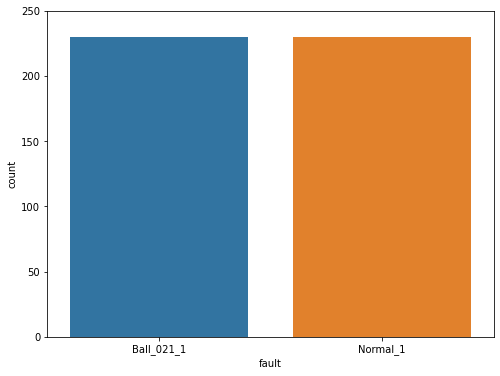

In [4]:
# Checking balance dataset 
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(df3['fault'])
plt.ylim([0, 250])
plt.rcParams.update({'font.size': 16})
plt.show()

In [5]:
# construct features data
X_data=df3.drop(['fault'],axis=1)

#construct class labels
Y_data=df3['fault']

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [7]:
X_data_scaled = StandardScaler().fit_transform(X_data)
X_data_scaled= pd.DataFrame(X_data_scaled,columns=["max","min","mean","std","rms","skewness","kurtosis"])
X_data.head(10)

,max,min,mean,sd,rms,skewness,kurtosis
460,0.43809,-0.43475,0.012897,0.143847,0.144389,0.053196,-0.229472
461,0.48858,-0.43350,0.011599,0.160661,0.161040,0.051585,-0.293900
462,0.54511,-0.45520,0.009436,0.159288,0.159528,0.060794,-0.232219
463,0.72577,-0.73036,0.009639,0.202982,0.203161,0.047942,0.184257
464,0.50151,-0.47105,0.008832,0.153959,0.154174,-0.000792,-0.236930
465,0.56243,-0.48941,0.010659,0.187998,0.188254,0.062110,-0.394849
466,0.51674,-0.47084,0.010922,0.185609,0.185885,0.057308,-0.424340
467,0.41243,-0.37801,0.009278,0.149397,0.149649,-0.035889,-0.499917
468,0.50506,-0.55742,0.008404,0.170494,0.170659,-0.078320,-0.256742
469,0.72640,-0.59226,0.011904,0.197341,0.197652,0.123938,0.425195


In [8]:
# PCA for data visualization
pca_2 = PCA(n_components=2)
pca_comp_2 = pca_2.fit_transform(X_data_scaled)
print(pca_2.explained_variance_ratio_)
pca_data_2 = pd.DataFrame(data = pca_comp_2, columns = ['pca 1', 'pca 2'])
pca_data_2['fault'] =Y_data.values

[0.67608476 0.14881176]


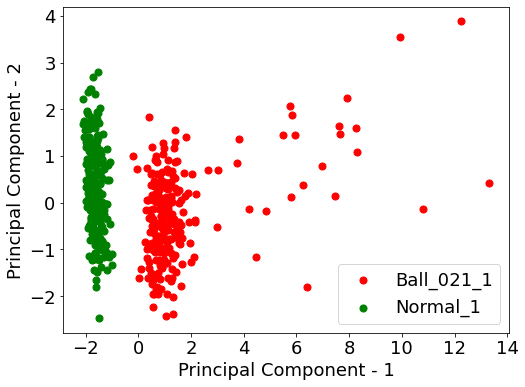

In [9]:
# Visualize first two PCA components 
plt.figure(figsize=(8,6))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Principal Component - 1',fontsize=18)
plt.ylabel('Principal Component - 2',fontsize=18)
targets = ["Ball_021_1","Normal_1"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_data_2['fault'] == target
    plt.scatter(pca_data_2.loc[indicesToKeep, 'pca 1']
               , pca_data_2.loc[indicesToKeep, 'pca 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 18})

In [10]:
# transform label from categorial to integer value
labels=LabelEncoder()
labels=labels.fit_transform(Y_data)

In [11]:
# split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, test_size=0.4, random_state=42)
X_val, X_test_final, y_val, y_test_final = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
#print(X_train)
#print(X_test)
print('size of x train:' ,X_train.shape)
print('size of x test:',X_test.shape)
print('size of y train:',y_train.shape)
print('size of y test:',y_test.shape)

print('size of x val:' ,X_val.shape)
print('size of x test final:',X_test_final.shape)
print('size of y val:',y_val.shape)
print('size of y test final:',y_test_final.shape)


size of x train: (276, 7)
size of x test: (184, 7)
size of y train: (276,)
size of y test: (184,)
size of x val: (92, 7)
size of x test final: (92, 7)
size of y val: (92,)
size of y test final: (92,)


In [12]:
# train decision tree models on  train and validation data set
clf= DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1, random_state=0)
clf= clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)  
y_pred_val = clf.predict(X_val)
acc_train = accuracy_score(y_train,y_pred_train)
acc_val = accuracy_score(y_val,y_pred_val)
print(acc_train)
print(acc_val)


1.0
1.0


[[47  0]
 [ 0 45]]


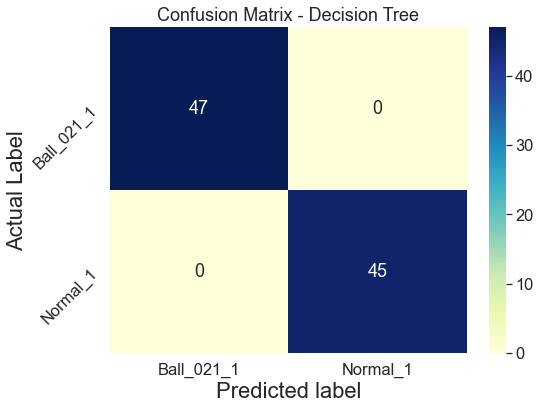

In [13]:
#plot confusion matrix of decision tree on validation set
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix_val)
sns .set( font_scale =1.5)
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix_val, annot=True, cmap='YlGnBu')
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =22)
ax.set_xticklabels(["Ball_021_1","Normal_1"])
ax.set_ylabel("Actual Label", fontsize=22)
ax.set_yticklabels(['Ball_021_1','Normal_1'])
plt.yticks(rotation=45)
plt.show()

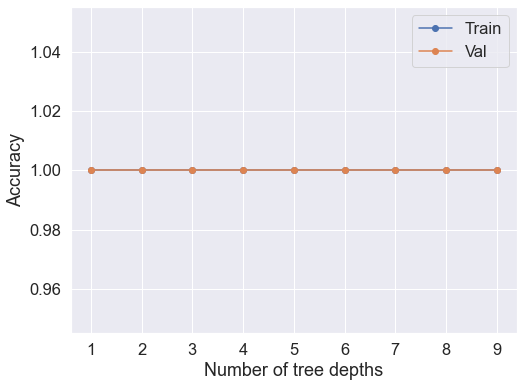

In [14]:
dept_max=range(1,10,1)
train_scores_1, val_scores_1 = list(), list()
for i in dept_max:
    clf_over= DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=i,random_state=0)
    clf_over= clf_over.fit(X_train,y_train)
    y_pred_train = clf_over.predict(X_train)  
    y_pred_val_over = clf_over.predict(X_val)
    acc_train_decision = accuracy_score(y_train,y_pred_train)
    acc_val_decision = accuracy_score(y_val,y_pred_val_over)
    train_scores_1.append(acc_train_decision)
    val_scores_1.append(acc_val_decision)
# plot of train and val scores vs tree depth
plt.figure(figsize=(8,6))
plt.plot(dept_max, train_scores_1, '-o', label='Train')
plt.plot(dept_max, val_scores_1, '-o', label='Val')
plt.xlabel('Number of tree depths', fontsize =18)
plt.ylabel('Accuracy', fontsize =18)
plt.legend()
plt.show()

In [15]:
# Decision tree accuracy with test data set  
y_pred_test = clf.predict(X_test_final)
acc_test_decision = accuracy_score(y_test_final,y_pred_test)
print(acc_test_decision)

1.0


[[47  0]
 [ 0 45]]


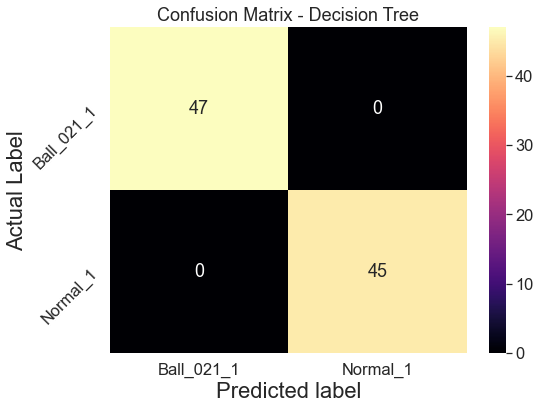

In [16]:
#plot confusion matrix on test data
confusion_matrix = confusion_matrix(y_test_final, y_pred_test)
print(confusion_matrix)
sns .set( font_scale =1.5)
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix, annot=True, cmap='magma')
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =22)
ax.set_xticklabels(["Ball_021_1","Normal_1"])
ax.set_ylabel("Actual Label", fontsize=22)
ax.set_yticklabels(['Ball_021_1','Normal_1'])
plt.yticks(rotation=45)
plt.show()
fig.savefig('confusion_matrix_1.png')

In [17]:
# Logistic regression accuracy on validation data set
clf_logi = LogisticRegression(C=1,random_state=0).fit(X_train, y_train)
pred_logi_train = clf_logi.predict(X_train)   
pred_logi_val = clf_logi.predict(X_val)  
train_score = clf_logi.score(X_train, y_train)
val_score = clf_logi.score(X_val, y_val)
train_loss  = log_loss(y_train,pred_logi_train)
val_loss  = log_loss(y_val,pred_logi_val)
print(train_score)
print(val_score)
print(train_loss)
print(val_loss)

1.0
1.0
9.992007221626415e-16
9.992007221626413e-16


[[47  0]
 [ 0 45]]


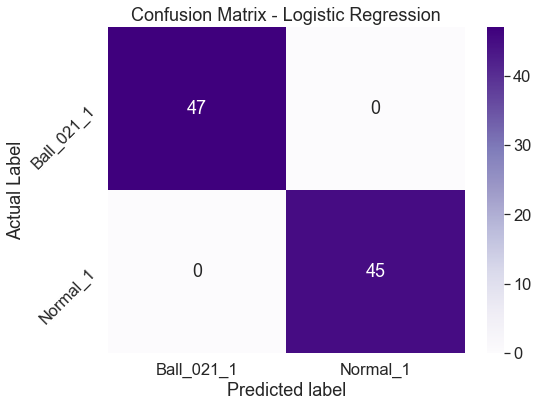

In [18]:
# confusion matrix on validation data set
from sklearn.metrics import confusion_matrix
confusion_matrix_logi_val = confusion_matrix(y_val, pred_logi_val)
print(confusion_matrix_logi_val)
sns .set( font_scale =1.5)
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix_logi_val, annot=True, cmap='Purples')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel("Predicted label", fontsize =18)
ax.set_xticklabels(["Ball_021_1","Normal_1"])
ax.set_ylabel("Actual Label", fontsize=18)
ax.set_yticklabels(['Ball_021_1','Normal_1'])
plt.yticks(rotation=45)
plt.show()

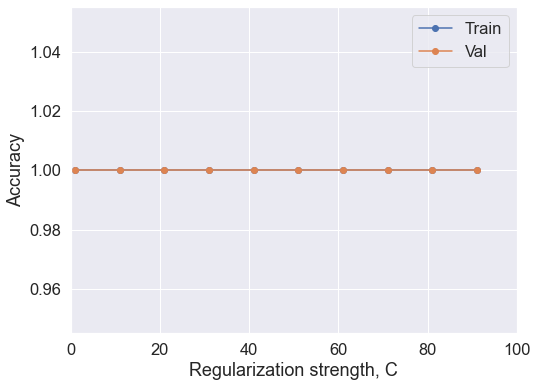

In [19]:
# Tuning regularization parameter C
C=range(1,100,10)
train_scores_2, val_scores_2 = list(), list()
for j in C:
    clf_logi = LogisticRegression(C=j, random_state=0).fit(X_train, y_train)
    pred_logi_train = clf_logi.predict(X_train)   
    pred_logi_val = clf_logi.predict(X_val)  
    train_score_logi = clf_logi.score(X_train, y_train)
    val_score_logi = clf_logi.score(X_val, y_val)    
    train_scores_2.append(train_score_logi)
    val_scores_2.append(val_score_logi)

# plot of train and val scores vs tree depth
plt.figure(figsize=(8,6))
plt.plot(C, train_scores_2, '-o', label='Train')
plt.plot(C, val_scores_2, '-o', label='Val')
plt.xlabel('Regularization strength, C', fontsize =18)
plt.ylabel('Accuracy', fontsize =18)
#plt.grid(False) 
plt.xlim([0,100])
#plt.ylim([0.5,1.2])
plt.legend()
plt.show()

In [20]:
# Logistic accuracy on test data set
pred_logi_test = clf_logi.predict(X_test_final)  
test_score = clf_logi.score(X_test_final, y_test_final)
test_loss  = log_loss(y_test_final,pred_logi_test)
print(test_score)
print(test_loss)

1.0
9.992007221626413e-16


[[47  0]
 [ 0 45]]


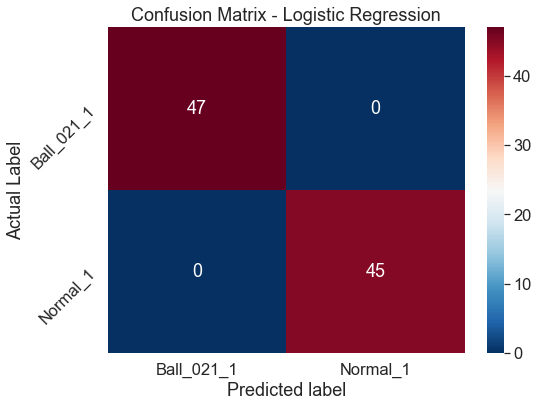

In [21]:
# confusion matrix on test data set
confusion_matrix_logi_test = confusion_matrix(y_test_final, pred_logi_test)
print(confusion_matrix_logi_test)
sns .set( font_scale =1.5)
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix_logi_test, annot=True, cmap='RdBu_r')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel("Predicted label", fontsize =18)
ax.set_xticklabels(["Ball_021_1","Normal_1"])
ax.set_ylabel("Actual Label", fontsize=18)
ax.set_yticklabels(['Ball_021_1','Normal_1'])
plt.yticks(rotation=45)
plt.show()